### Problem Statement

Given dataset named **`"social_network_ads.csv"`**, which includes information about users' age, gender, estimated salary, and whether they purchased a product or not. The dataset comprises the following columns:

- `user_id:` The unique identifier for each user.
- `gender:` The gender of the user.
- `age:` The age of the user.
- `estimated_salary:` The estimated salary of the user.
- `purchased:` Whether the user purchased the product or not (0 for No, 1 for Yes).

Built and evaluated a logistic regression model to predict whether a user will purchase the product based on their age, gender and estimated salary. Also evaluaed the model's performance using precision, recall, and other classification metrics.

In [1]:
import pandas as pd

### Data Preparation and Exploration


In [2]:
df = pd.read_csv("social_network_ads.csv")


print(df.shape)
df.head()

(400, 5)


,user_id,gender,age,estimated_salary,purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.isna().sum()

user_id             0
gender              0
age                 0
estimated_salary    0
purchased           0
dtype: int64

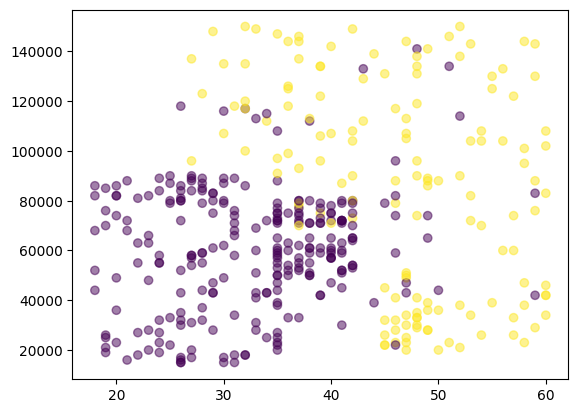

In [4]:
import matplotlib.pyplot as plt

plt.scatter(df.age,df.estimated_salary,c=df.purchased,cmap='viridis',alpha=0.5)

### Model Training Using Logistic Regression


In [5]:
df.gender = df.gender.map({"Male": 0, "Female":1})
df.head()


,user_id,gender,age,estimated_salary,purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


In [15]:
X = df.drop(['user_id','purchased'],axis=1)
y = df['purchased']
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [16]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)

model.coef_,model.intercept_

(array([[-2.49140874e-01,  1.99914592e-01,  3.33049172e-05]]),
 array([-10.88919902]))

### Model Evaluation


In [19]:
y_pred = model.predict(X_test)
X_test[:10],y_pred[:10]

(     gender  age  estimated_salary
 209       1   46             22000
 280       1   59             88000
 33        1   28             44000
 210       1   48             96000
 93        1   29             28000
 84        1   30             62000
 329       1   47            107000
 94        1   29             83000
 266       0   40             75000
 126       0   42             65000,
 array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0]))

In [25]:
model.predict_proba(X_test)[:10]

array([[0.77022118, 0.22977882],
       [0.02692375, 0.97307625],
       [0.98329687, 0.01670313],
       [0.16045689, 0.83954311],
       [0.98797036, 0.01202964],
       [0.95589173, 0.04410827],
       [0.13928131, 0.86071869],
       [0.92933433, 0.07066567],
       [0.59742482, 0.40257518],
       [0.58126453, 0.41873547]])

In [28]:
# Logic behind model.predict --> applied sigmoid function on top of linear regression

In [27]:
# y = m1x1+m2x2+m3x3 + b
import math
y = model.coef_[0][0]*1 + model.coef_[0][1]*46 + model.coef_[0][2]*22000 + model.intercept_
sigmoid = 1/(1+math.exp(-y))
sigmoid

/var/folders/kg/11tps70n3wb66s6pg8w0z5bc0000gn/T/ipykernel_98751/2001146402.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sigmoid = 1/(1+math.exp(-y))


0.22977882348240608

In [31]:
# model evaluation
from sklearn.metrics import classification_report,confusion_matrix

report = classification_report(y_pred,y_test)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.83      0.89        86
           1       0.68      0.94      0.79        34

    accuracy                           0.86       120
   macro avg       0.83      0.88      0.84       120
weighted avg       0.89      0.86      0.86       120



In [32]:
cm = confusion_matrix(y_pred,y_test)
cm

array([[71, 15],
       [ 2, 32]])

<Axes: >

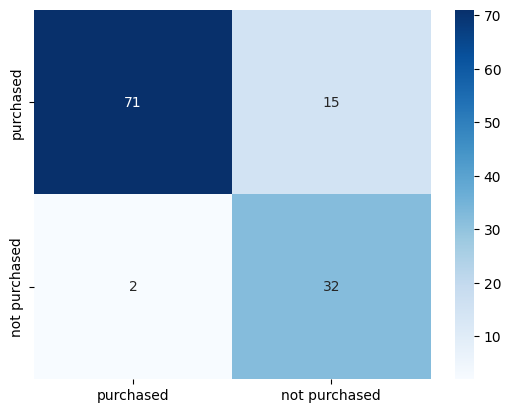

In [37]:
import seaborn as sns
labels = ["purchased","not purchased"]
sns.heatmap(cm,annot=True,xticklabels=labels,yticklabels=labels,cmap="Blues")

In [ ]:
#logic behind precision and recall

In [45]:
print("precision and recall for: Purchased")
71/86,71/73

precision and recall for: Purchased


(0.8255813953488372, 0.9726027397260274)

In [42]:
y_test.value_counts()

purchased
0    73
1    47
Name: count, dtype: int64